# Тестовое задание на продакт-аналитика ВК

## Общий взгляд на данные

In [284]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
dataset = pd.read_csv("analytics_test.csv")

In [286]:
dataset.head()

,Unnamed: 0,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time
0,0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0
1,1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0
2,2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0
3,3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0
4,4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0


In [287]:
dataset.describe()

,Unnamed: 0,user_id,age,query_id,click_position,view_time
count,20000.000000,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000
mean,9999.500000,4.940472e+07,30.029600,1.629075e+08,6.216150,614.775450
std,5773.647028,2.896590e+07,22.588294,2.443505e+08,6.389262,2217.290922
min,0.000000,1.273000e+03,0.000000,8.758000e+03,0.000000,0.000000
25%,4999.750000,2.405560e+07,11.000000,3.215079e+07,0.000000,0.000000
50%,9999.500000,4.946180e+07,30.000000,6.425107e+07,4.000000,0.000000
75%,14999.250000,7.429182e+07,50.000000,9.664634e+07,10.000000,0.000000
max,19999.000000,9.999570e+07,69.000000,9.998612e+08,30.000000,17994.000000


Сбрасываем ненужную unnamed

In [288]:
dataset.drop(['Unnamed: 0'], inplace=True, axis=1)

Добавляем больше численных данных: из текста запроса получаем длину запроса и количество слов в нем

In [289]:
dataset["query_text_length"] =  dataset["query_text"].apply(len)
dataset["query_text_wordcount"] = dataset["query_text"].apply(lambda x: len(x.split()))

In [290]:
dataset.head()

,user_id,sex,age,platform,query_id,query_text,query_type,event,click_position,doc_type,view_time,query_text_length,query_text_wordcount
0,96422511,female,68,android,89656828,передачи о новых технологиях,show,share,6,playlist,0,28,4
1,45247030,male,62,android_tv,89784877,автопрому новости,news,search,0,NaN,0,17,2
2,79572413,male,12,web,10555855,логистическое законодательство,news,search,0,NaN,0,30,2
3,821317,female,58,android_tv,72054848,банковские премии новости,news,search,0,NaN,0,25,3
4,6206023,female,24,android,20838049,вики шоу аманда,show,subscribe,7,author,0,15,3


In [291]:
dataset.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,2.000000e+04,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.940472e+07,30.029600,1.629075e+08,6.216150,614.775450,25.839900,3.805000
std,2.896590e+07,22.588294,2.443505e+08,6.389262,2217.290922,7.284155,1.290526
min,1.273000e+03,0.000000,8.758000e+03,0.000000,0.000000,8.000000,1.000000
25%,2.405560e+07,11.000000,3.215079e+07,0.000000,0.000000,21.000000,3.000000
50%,4.946180e+07,30.000000,6.425107e+07,4.000000,0.000000,25.000000,4.000000
75%,7.429182e+07,50.000000,9.664634e+07,10.000000,0.000000,30.000000,4.000000
max,9.999570e+07,69.000000,9.998612e+08,30.000000,17994.000000,100.000000,20.000000


In [292]:
def objects_distribution(ds, rem):
    obj_cols = list(ds.select_dtypes(include='object').columns)
    for rem_obj in rem:
        obj_cols.remove(rem_obj)
    fig, axes = plt.subplots(len(obj_cols), 2)
    fig.set_size_inches(10, len(obj_cols) * 5)
    fig.suptitle("Распределение категориальных данных")
    for i, obj_col in enumerate(obj_cols):
        df = pd.DataFrame([ds[obj_col].value_counts()])
        cols = list(df.columns)
        vals = [df[col].iloc[0] for col in cols]
        nan_num = ds[obj_col].isna().sum()
        if nan_num > 0:
            cols.append("nan")
            vals.append(nan_num)
        bars_container = axes[i][0].bar(cols, vals)
        axes[i][0].set_title(f"{obj_col}: bars")
        axes[i][0].bar_label(bars_container)
        axes[i][1].pie(vals, labels=cols, autopct='%1.1f%%')
        axes[i][1].set_title(f"{obj_col}: pie")

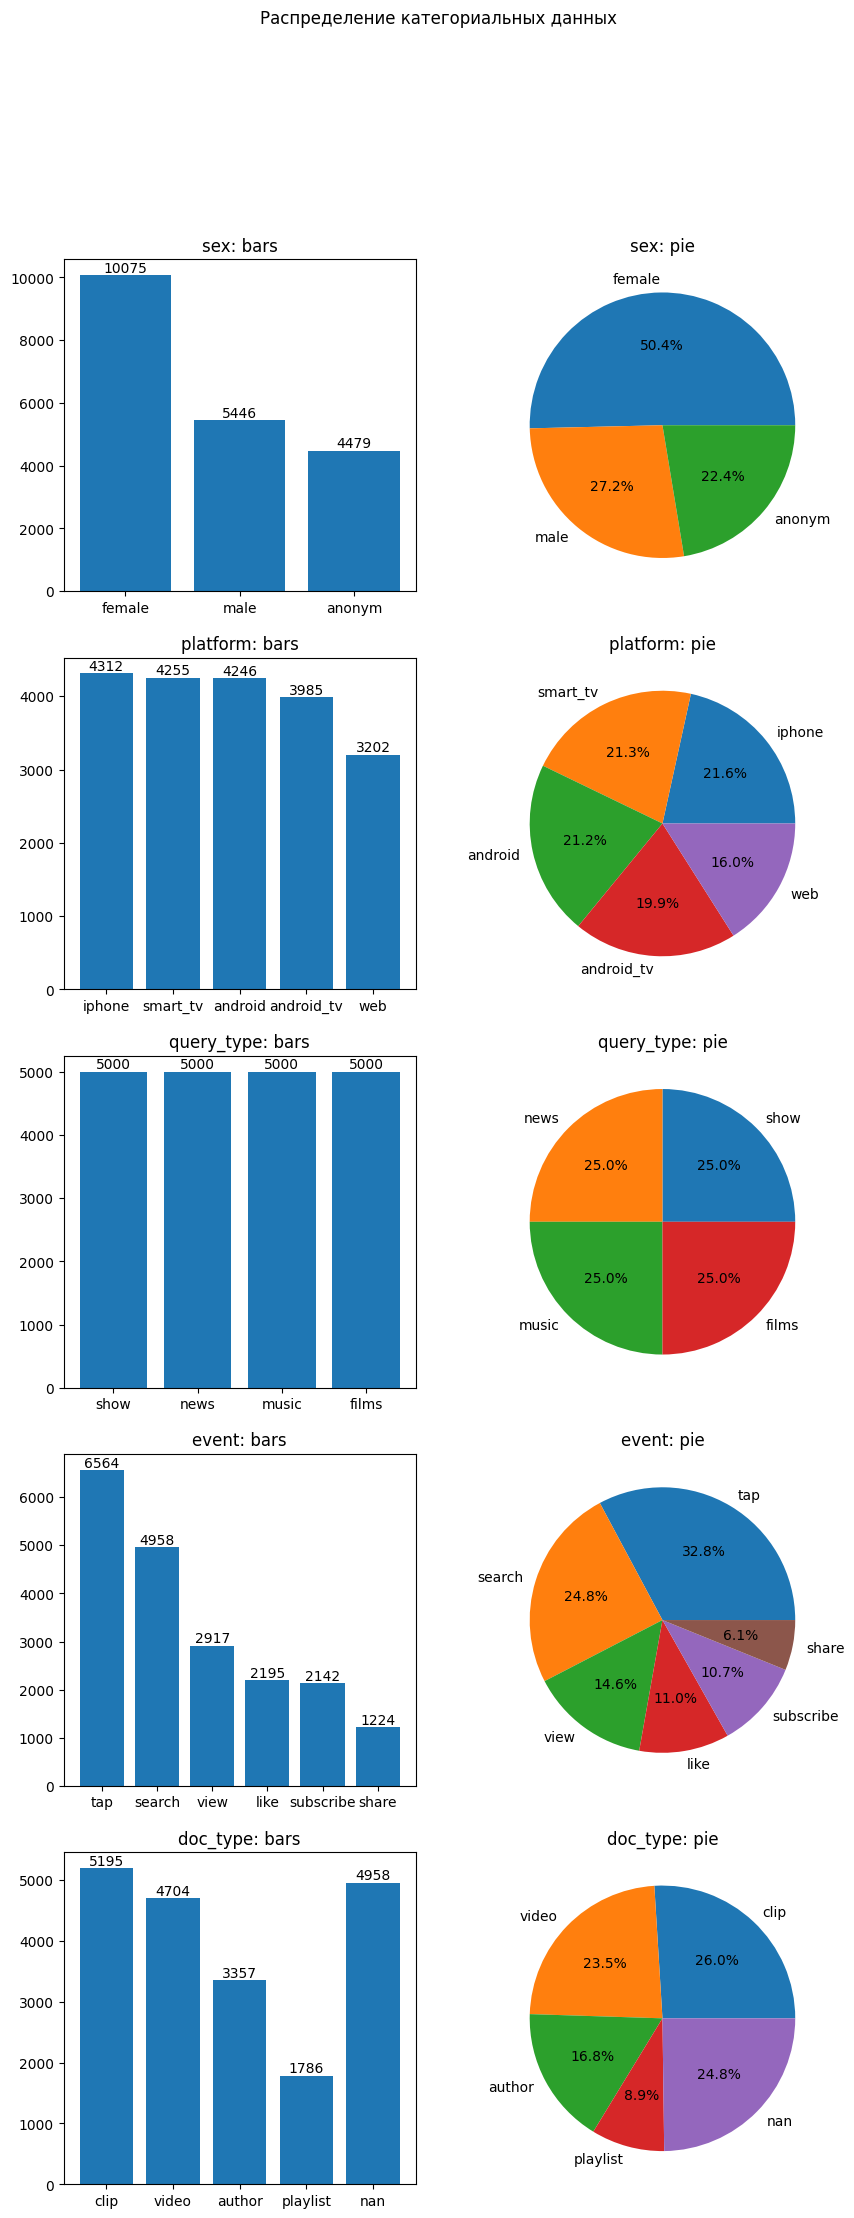

In [293]:
objects_distribution(dataset, ["query_text"])

Предположим, сколько-то адекватные запросы можно формулировать начиная с 5 лет, отфильтруем age

In [294]:
dataset = dataset[dataset["age"] >= 5]

In [295]:
dataset.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.526700e+04,15267.000000,1.526700e+04,15267.000000,15267.000000,15267.000000,15267.000000
mean,4.929021e+07,39.339228,1.008937e+08,6.897950,435.466758,25.190149,3.685858
std,2.897877e+07,17.382840,1.754010e+08,6.693653,1730.117366,7.164282,1.297777
min,1.273000e+03,10.000000,1.146600e+04,0.000000,0.000000,8.000000,1.000000
25%,2.401440e+07,24.000000,2.793729e+07,0.000000,0.000000,20.000000,3.000000
50%,4.912038e+07,39.000000,5.583657e+07,6.000000,0.000000,25.000000,3.000000
75%,7.419500e+07,55.000000,8.360249e+07,11.000000,0.000000,29.000000,4.000000
max,9.999474e+07,69.000000,9.996379e+08,30.000000,17986.000000,100.000000,20.000000


In [296]:
dataset.dtypes

user_id                  int64
sex                     object
age                      int64
platform                object
query_id                 int64
query_text              object
query_type              object
event                   object
click_position           int64
doc_type                object
view_time                int64
query_text_length        int64
query_text_wordcount     int64
dtype: object

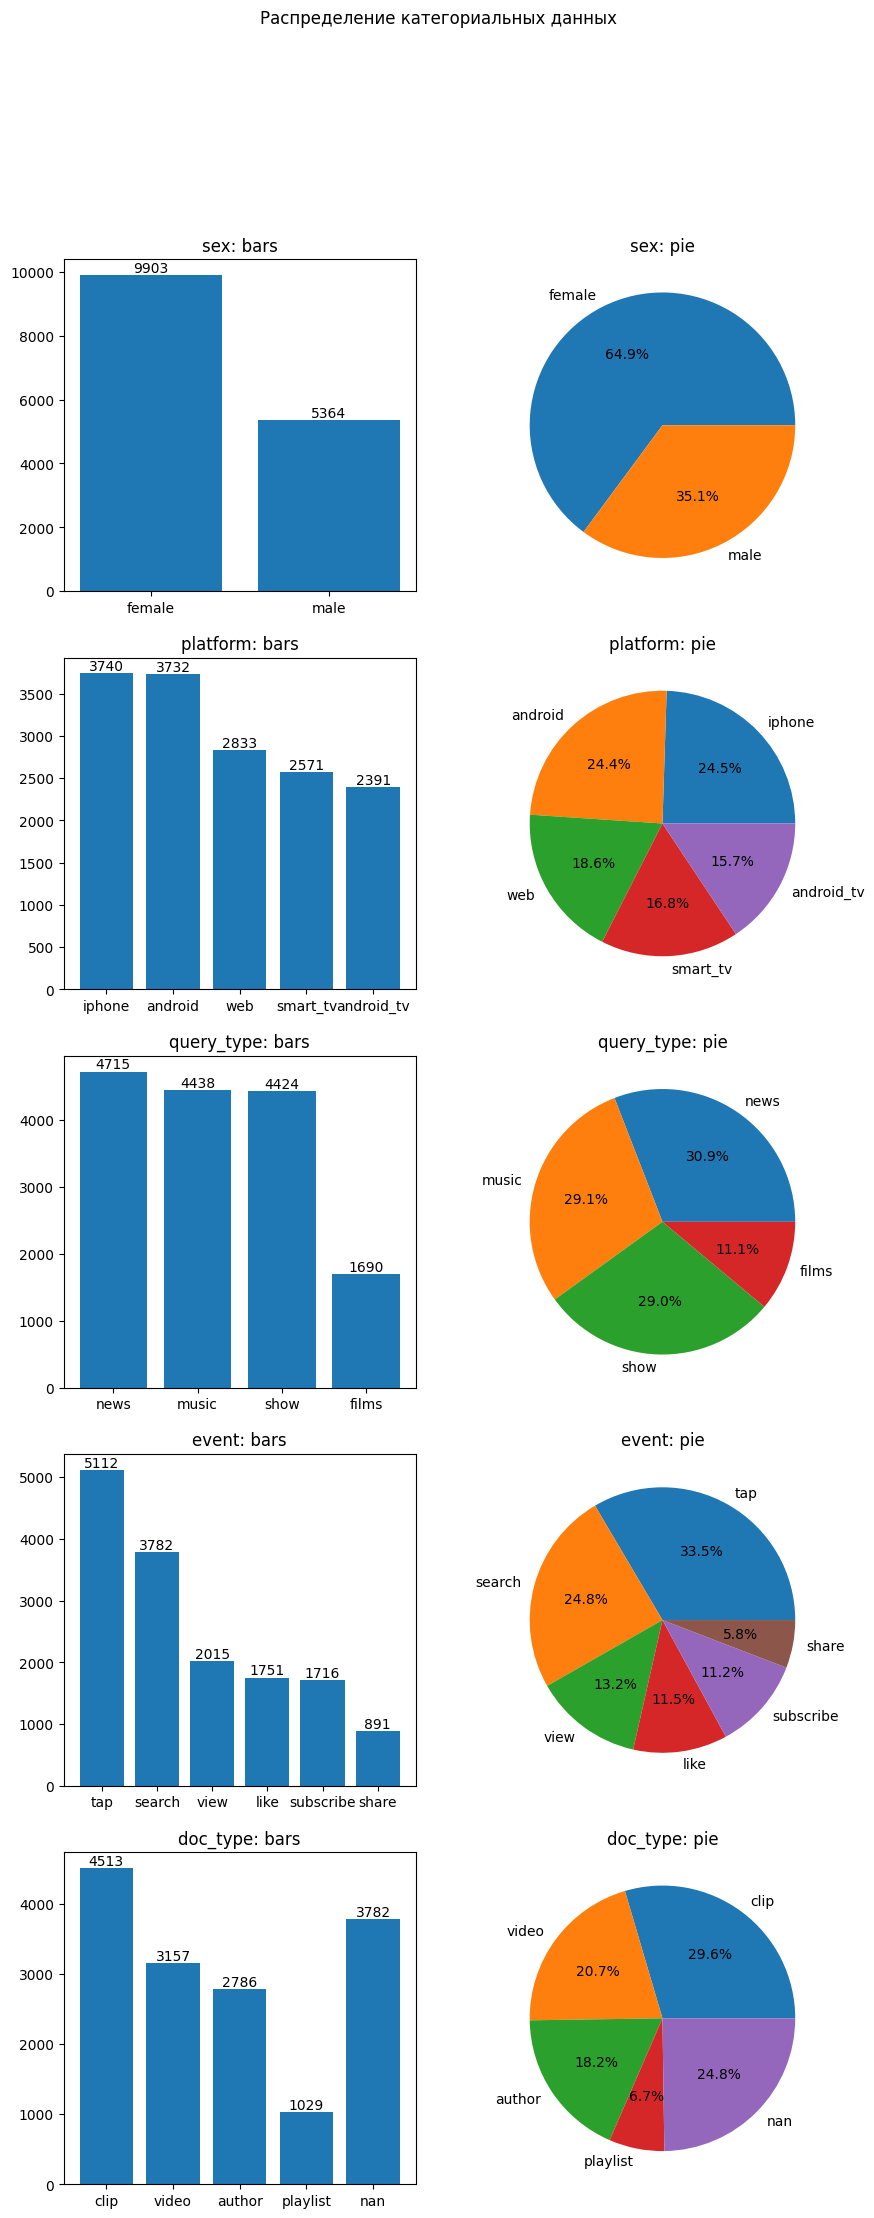

In [297]:
objects_distribution(dataset, ["query_text"])

Убрав возраст <5, мы убрали всех анонимов, теперь пол конкретно определен у всех. По остальным категориям сохранились пропорции

## Интерпретация nan в типе документа

Посмотрим, как следует интерпретировать nan в doc_type. Вряд ли это просто пропуски в данных, проверим, может ли это быть что ничего не выбрано при поиске

Проверим разброс категориальных данных по типам event

In [298]:
obj_cols_by_doctype = obj_cols.copy()
obj_cols_by_doctype.remove("doc_type")
# отфильтруем по доктайпам
doctypes = list(dataset["doc_type"].unique())
doctypes.remove(np.nan)
doctypes = np.array(doctypes)
obj_cols_by_doctype, doctypes

(['sex', 'platform', 'query_type', 'event'],
 array(['playlist', 'author', 'video', 'clip'], dtype='<U8'))

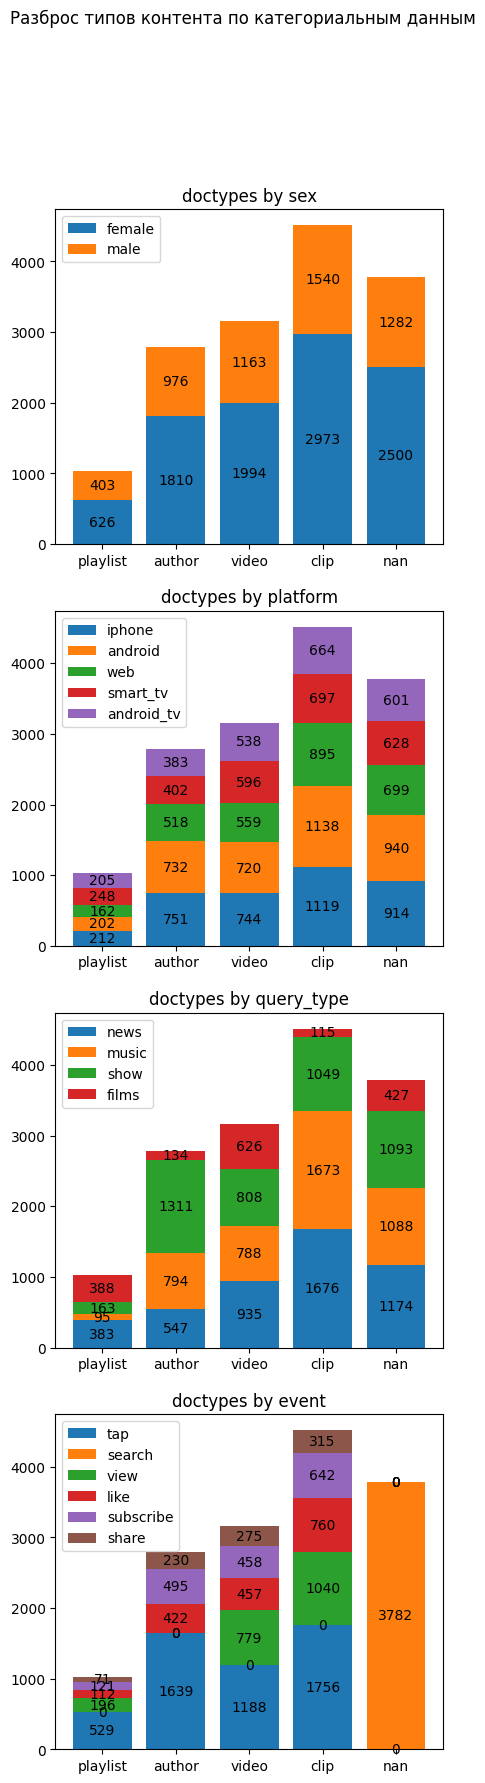

In [299]:
fig, axes = plt.subplots(len(obj_cols_by_doctype))
fig.set_size_inches(5, len(obj_cols_by_doctype) * 5)
fig.suptitle("Разброс типов контента по категориальным данным")
for i, obj_col in enumerate(obj_cols_by_doctype):
    # print(obj_col)    
    # хотим построить диаграмму, в которой покажутся категориальные данные по количеству доктайпов
    df = pd.DataFrame([dataset[obj_col].value_counts()])
    unique_objects_cols = list(df.columns)
    unique_object_counts = {}
    for obj in unique_objects_cols:
        unique_object_counts[obj] = []
        for doctype in doctypes:
            unique_object_counts[obj].append(
                dataset[(dataset["doc_type"] == doctype) & (dataset[obj_col] == obj) ].shape[0]
            )
        unique_object_counts[obj].append(
            dataset[(dataset["doc_type"].isna()) & (dataset[obj_col] == obj) ].shape[0]
        )
    doctypes_print = np.array(list(doctypes) + ["nan"])
    bottom = np.zeros(len(doctypes_print))
    # print(unique_object_counts, doctypes_print)
    for obj, obj_count in unique_object_counts.items():
        # print(len(unique_objects_cols), len(obj_count))
        p = axes[i].bar(doctypes_print, obj_count, label=obj, bottom=bottom)
        bottom += np.array( obj_count)
        axes[i].bar_label(p, label_type='center')
        axes[i].legend()
        axes[i].set_title(f"doctypes by {obj_col}")

Итак, НАНы значит мы ищем, но не тапаем, не смотрим, не лайкаем и не репостим. Получается, это значит, контент не выбран. Зацепимся за них.

По классификации запросов (query_type) видно больше наны пропорционально есть во всех типах искомого контента.

Посмотрим тогда, какая зависимость этих нанов, click_position, view_time (ожидаю что 0), query_text_length, query_text_wordcount

In [302]:
dataset_nan = dataset[dataset["doc_type"].isna()]
dataset_nan.shape

(3782, 13)

In [303]:
dataset_nan.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,3.782000e+03,3782.000000,3.782000e+03,3782.0,3782.0,3782.000000,3782.000000
mean,4.982940e+07,39.915653,1.009005e+08,0.0,0.0,25.248017,3.666843
std,2.901556e+07,17.533148,1.751816e+08,0.0,0.0,7.033102,1.245380
min,3.472300e+04,10.000000,3.472300e+04,0.0,0.0,8.000000,2.000000
25%,2.382062e+07,25.000000,2.737558e+07,0.0,0.0,20.000000,3.000000
50%,5.012605e+07,40.000000,5.588265e+07,0.0,0.0,25.000000,3.000000
75%,7.513859e+07,56.000000,8.401351e+07,0.0,0.0,29.000000,4.000000
max,9.995524e+07,69.000000,9.994174e+08,0.0,0.0,100.000000,20.000000


Уже даже тут видно, что клика совершено не было (0), просмотров соответственно тоже

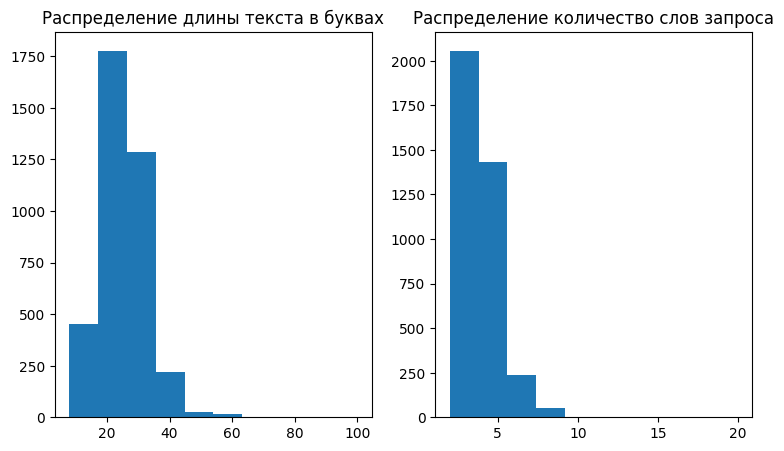

In [304]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(9, 5)
# fig.suptitle("")
axes[0].hist(dataset_nan["query_text_length"] )
axes[0].set_title("Распределение длины текста в буквах")
axes[1].hist(dataset_nan["query_text_wordcount"] )
axes[1].set_title("Распределение количество слов запроса")
plt.show()

Посмотрим теперь уникальность id поиска

In [305]:
print(f"строк в оригинальном датасете: {dataset.shape[0]}")
print(f"уникальных query_id: {len(dataset["query_id"].unique() )}")
print(f"строк в датасете нанов: {dataset_nan.shape[0]}")
print(f"уникальных query_id в неуспешном поиске: {len(dataset_nan["query_id"].unique() )}")

строк в оригинальном датасете: 15267
уникальных query_id: 13919
строк в датасете нанов: 3782
уникальных query_id в неуспешном поиске: 3544


То есть уникальный id поиска присваивается не каждому новому запросу. Вероятно, в одну сессию запросов (до обновления страницы или что-то в этом роде)

Собираем данные по поискам, которые в датасете из нанов состоят из более чем одного запроса (то есть несколько раз поискали и все разы ничего не нашли

Затем собираем данные из большого датасета, для которых тоже искали несколько раз

In [306]:
def filter_2plus_queries(ds):
    query_ids_all = ds["query_id"].value_counts().to_frame().reset_index()
    queries2plus = query_ids_all[query_ids_all["count"] >= 2]["query_id"].unique()
    return ds[ds["query_id"].isin(queries2plus)]    

In [307]:
dataset_nan_2plus = filter_2plus_queries(dataset_nan)
dataset_2plus = filter_2plus_queries(dataset)

In [308]:
# тут ожидаемо всё еще всё плохо
dataset_nan_2plus.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,4.730000e+02,473.000000,4.730000e+02,473.0,473.0,473.000000,473.000000
mean,4.686978e+07,39.767442,5.110714e+07,0.0,0.0,25.033827,3.957717
std,3.013873e+07,17.544642,2.997828e+07,0.0,0.0,6.903920,1.199536
min,8.480900e+04,10.000000,7.411340e+05,0.0,0.0,9.000000,2.000000
25%,1.886908e+07,24.000000,2.404795e+07,0.0,0.0,20.000000,3.000000
50%,4.565900e+07,40.000000,5.205650e+07,0.0,0.0,24.000000,4.000000
75%,7.485336e+07,55.000000,7.817321e+07,0.0,0.0,29.000000,4.000000
max,9.981163e+07,69.000000,9.962933e+07,0.0,0.0,63.000000,10.000000


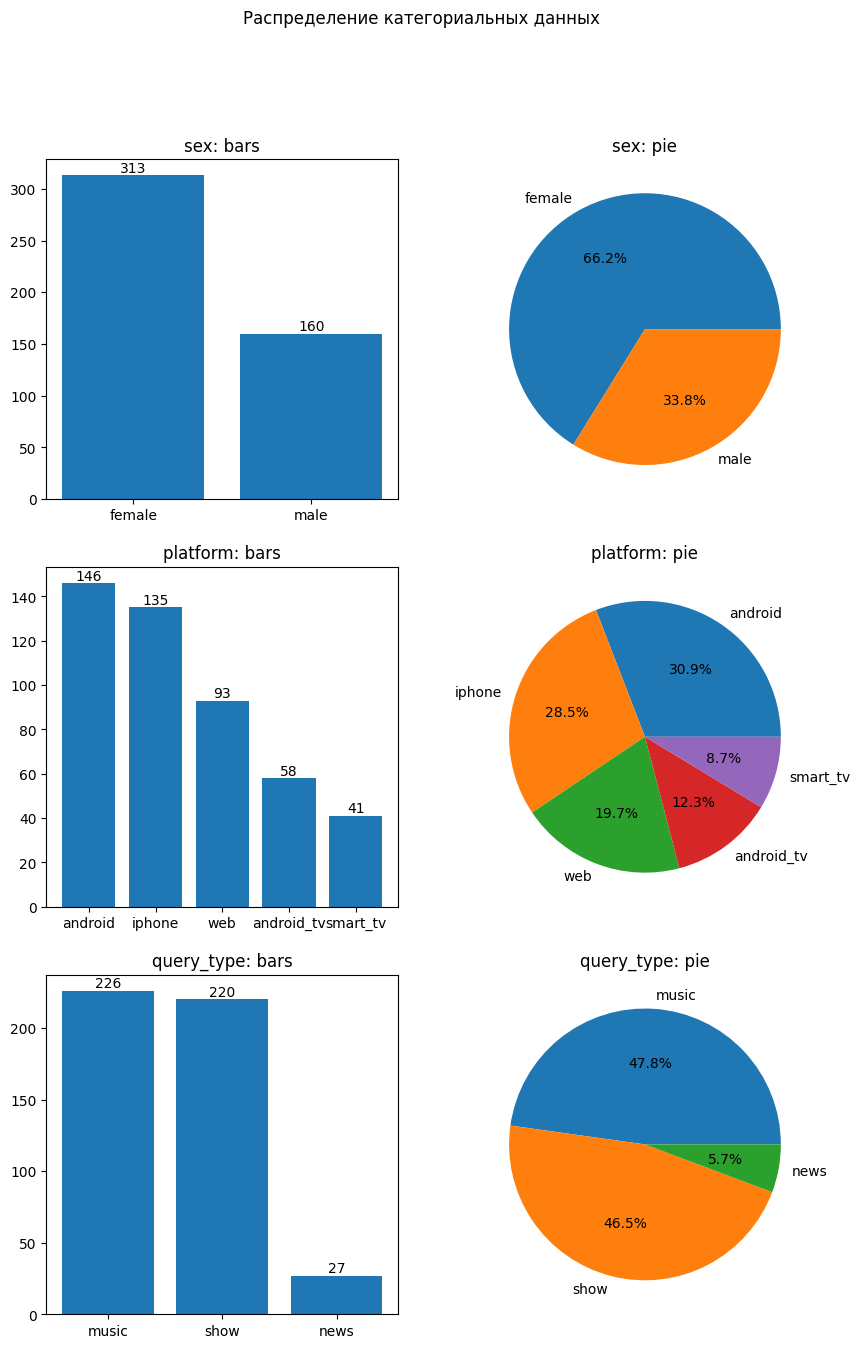

In [310]:
objects_distribution(dataset_nan_2plus, ["query_text", "event", "doc_type"])

In [262]:
dataset_2plus.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,2.643000e+03,2643.000000,2.643000e+03,2643.000000,2643.000000,2643.000000,2643.00000
mean,4.785823e+07,38.865683,4.994848e+07,6.415059,271.709043,24.525161,3.81801
std,2.901671e+07,17.248960,2.894739e+07,6.097606,1180.879970,6.989640,1.25232
min,1.046200e+04,10.000000,3.283880e+05,0.000000,0.000000,8.000000,1.00000
25%,2.228784e+07,24.000000,2.495610e+07,1.000000,0.000000,19.000000,3.00000
50%,4.651606e+07,38.000000,4.949038e+07,5.000000,0.000000,24.000000,4.00000
75%,7.229596e+07,54.000000,7.480659e+07,10.000000,0.000000,28.000000,4.00000
max,9.981369e+07,69.000000,9.988562e+07,30.000000,10721.000000,68.000000,12.00000


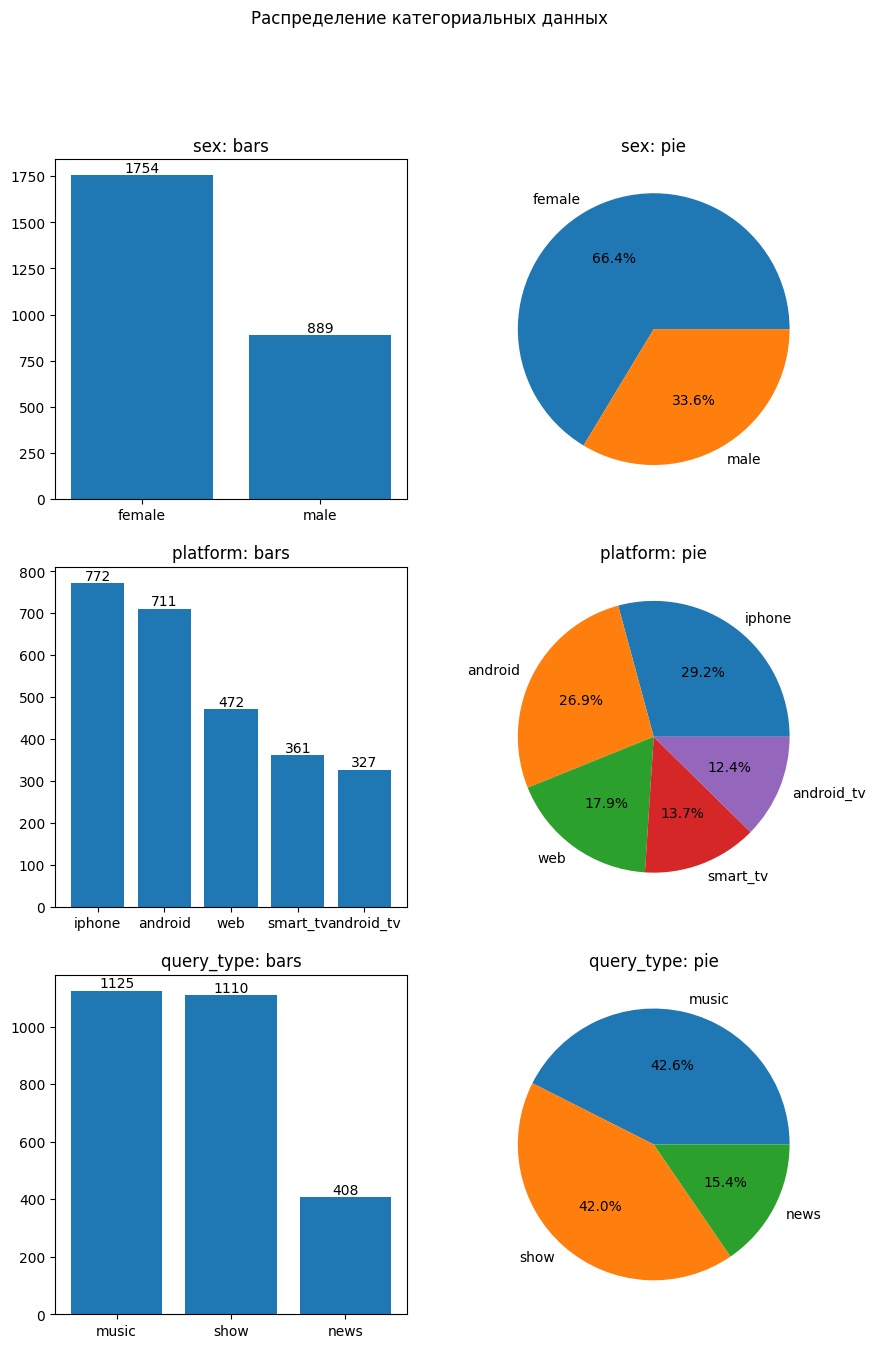

In [311]:
objects_distribution(dataset_2plus, ["query_text", "event", "doc_type"])

In [312]:
dataset_2plus_no_authors = dataset_2plus[dataset_2plus["doc_type"] != "author"]

In [313]:
dataset_2plus_no_authors.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,2.070000e+03,2070.000000,2.070000e+03,2070.000000,2070.000000,2070.000000,2070.000000
mean,4.753753e+07,38.963285,4.978712e+07,6.600483,346.921256,24.563285,3.761353
std,2.884782e+07,17.253704,2.933836e+07,6.388373,1324.600424,6.813302,1.215755
min,1.046200e+04,10.000000,3.283880e+05,0.000000,0.000000,9.000000,1.000000
25%,2.203795e+07,24.000000,2.407767e+07,0.000000,0.000000,20.000000,3.000000
50%,4.662155e+07,38.500000,4.878034e+07,6.000000,0.000000,24.000000,4.000000
75%,7.169721e+07,54.000000,7.569672e+07,11.000000,0.000000,28.000000,4.000000
max,9.981369e+07,69.000000,9.988562e+07,30.000000,10721.000000,63.000000,12.000000


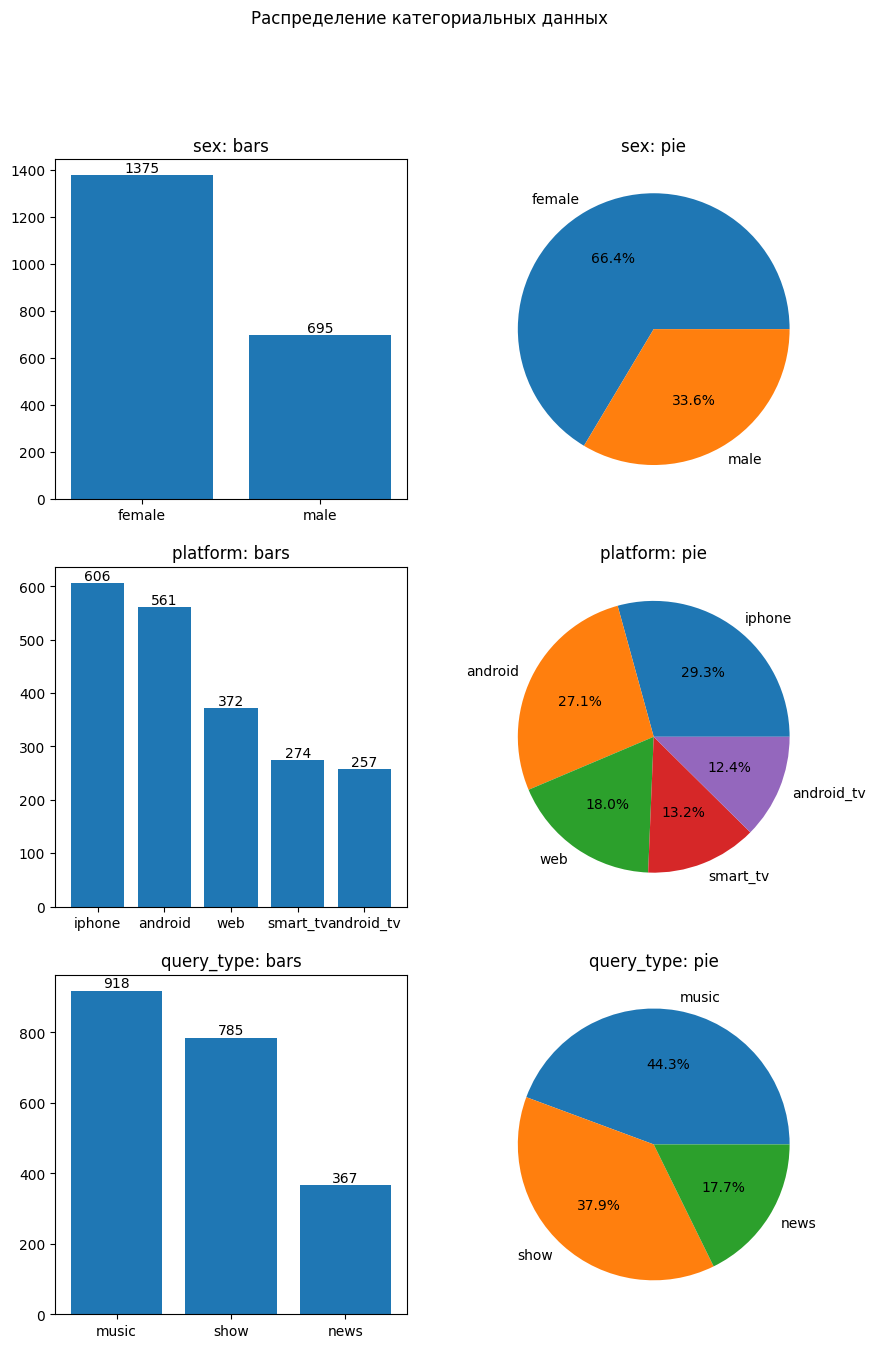

In [314]:
objects_distribution(dataset_2plus_no_authors, ["query_text", "event", "doc_type"])

Фильмы не ищут по второму разу, если не нашли в первый раз. Видимо, понимают про авторские права.

75%-й перцентиль времени просмотра НЕ авторов всё еще 0 - то есть повторные поиски в конечном счете не особо увенчиваются успехом

75%-й перцентиль кликов это 10-я позиция в очереди - всё еще очень печально

### Промежуточный вывод

Четверть всех результатов нерелевантны. Повторные запросы не решают проблемы.

## Категории нерелеватности запроса

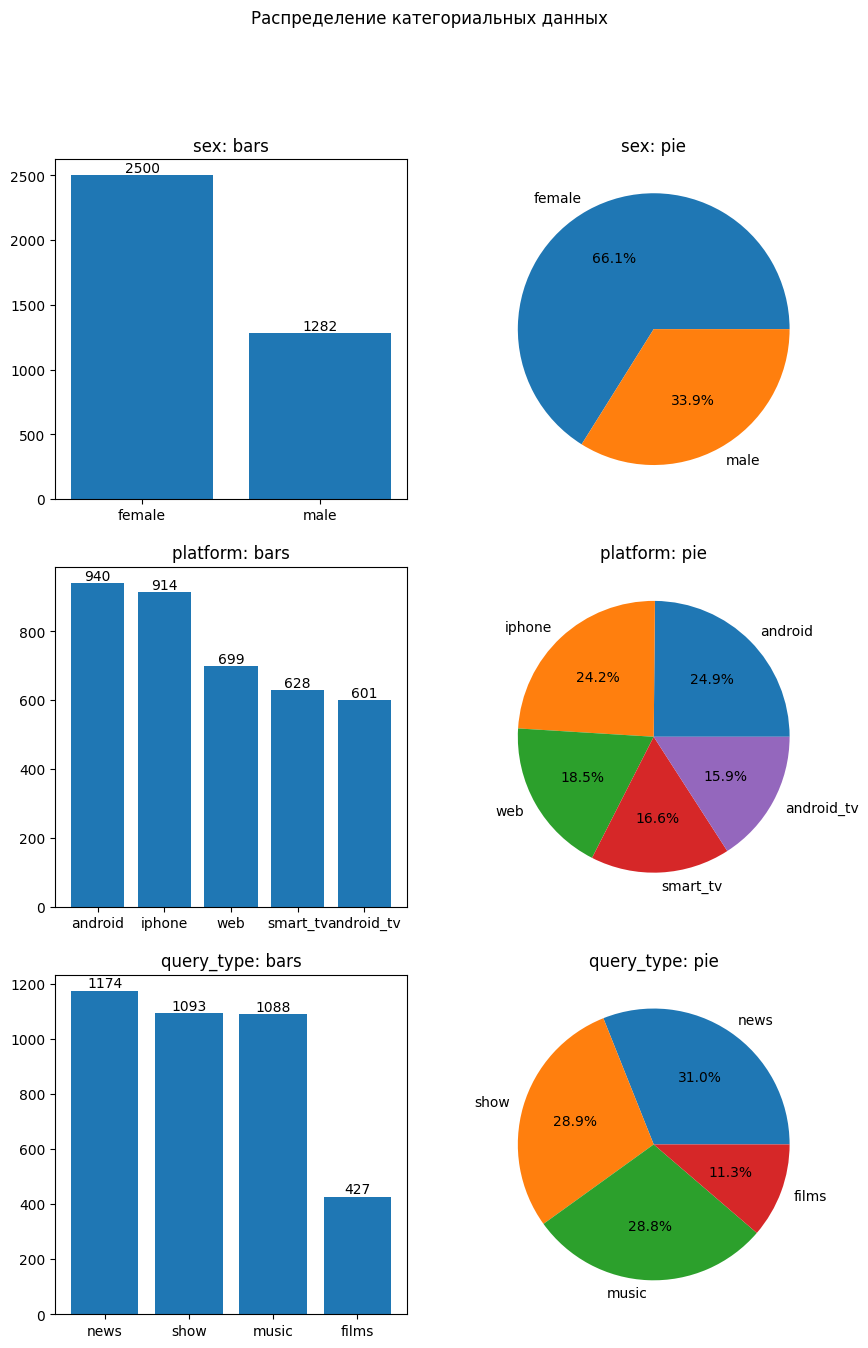

In [316]:
objects_distribution(dataset_nan, ["query_text", "event", "doc_type"])

Если посмотреть на категории, то почти одинаково плохо (неуспешно) определяются запросы, классифицирующиеся как шоу, музыка и новости. Процентное соотношение платформ осталось прежним, гендерный дисбаланс тоже.

Будем смотреть отдельно на проблемные секторы категорий поиска, но сначала - датасет безупречных поисков

In [317]:
dataset_no_nan = dataset[dataset["doc_type"].notna()]

In [319]:
dataset_no_nan.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.148500e+04,11485.000000,1.148500e+04,11485.000000,11485.000000,11485.000000,11485.000000
mean,4.911266e+07,39.149412,1.008915e+08,9.169438,578.865564,25.171093,3.692120
std,2.896571e+07,17.329629,1.754808e+08,6.223378,1973.846255,7.207158,1.314567
min,1.273000e+03,10.000000,1.146600e+04,0.000000,0.000000,8.000000,1.000000
25%,2.405675e+07,24.000000,2.827378e+07,4.000000,0.000000,20.000000,3.000000
50%,4.879624e+07,39.000000,5.583128e+07,8.000000,0.000000,25.000000,3.000000
75%,7.390180e+07,54.000000,8.351746e+07,13.000000,0.000000,29.000000,4.000000
max,9.999474e+07,69.000000,9.996379e+08,30.000000,17986.000000,100.000000,20.000000


даже в успешных поисках средний номер выбранного айтема - 9.

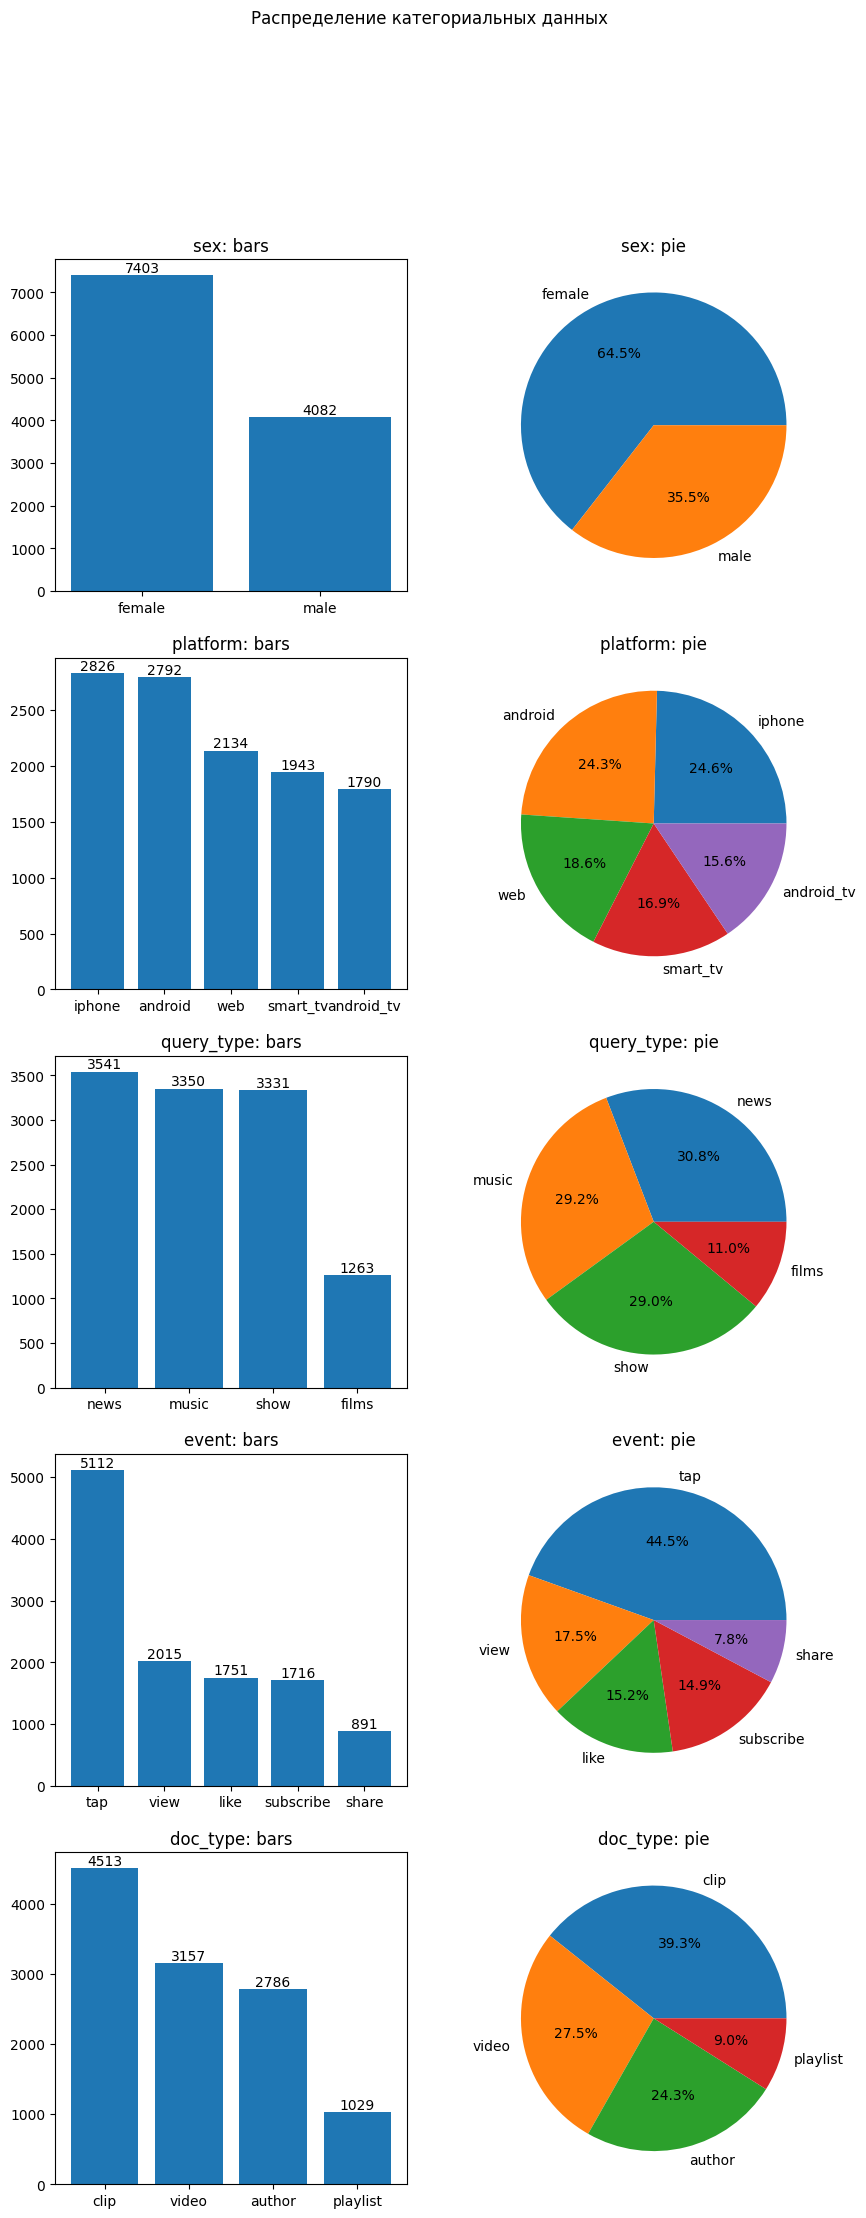

In [321]:
objects_distribution(dataset_no_nan, ["query_text"])

В датасете, где все поиски успешны, тапают всё равно в 3 раза больше, чем смотрят. Разделим и тут по категориям поиска, тем более что они сохранили свою пропорцию относительно датасета неуспешных поисков

### Новости

In [322]:
dataset_nan_news = dataset_nan[dataset_nan["query_type"]=="news"]
dataset_news = dataset[dataset["query_type"]=="news"]
dataset_no_nan_news = dataset_no_nan[dataset_no_nan["query_type"]=="news"]

In [323]:
dataset_nan_news.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.174000e+03,1174.000000,1.174000e+03,1174.0,1174.0,1174.000000,1174.000000
mean,5.091778e+07,41.070698,4.937101e+07,0.0,0.0,24.297274,2.751278
std,2.926889e+07,17.634228,2.884618e+07,0.0,0.0,5.174636,0.505193
min,1.927560e+05,10.000000,1.899420e+05,0.0,0.0,11.000000,2.000000
25%,2.519596e+07,26.000000,2.435068e+07,0.0,0.0,21.000000,2.000000
50%,5.171076e+07,41.000000,4.948936e+07,0.0,0.0,24.500000,3.000000
75%,7.618969e+07,57.000000,7.398962e+07,0.0,0.0,28.000000,3.000000
max,9.994831e+07,69.000000,9.980752e+07,0.0,0.0,37.000000,5.000000


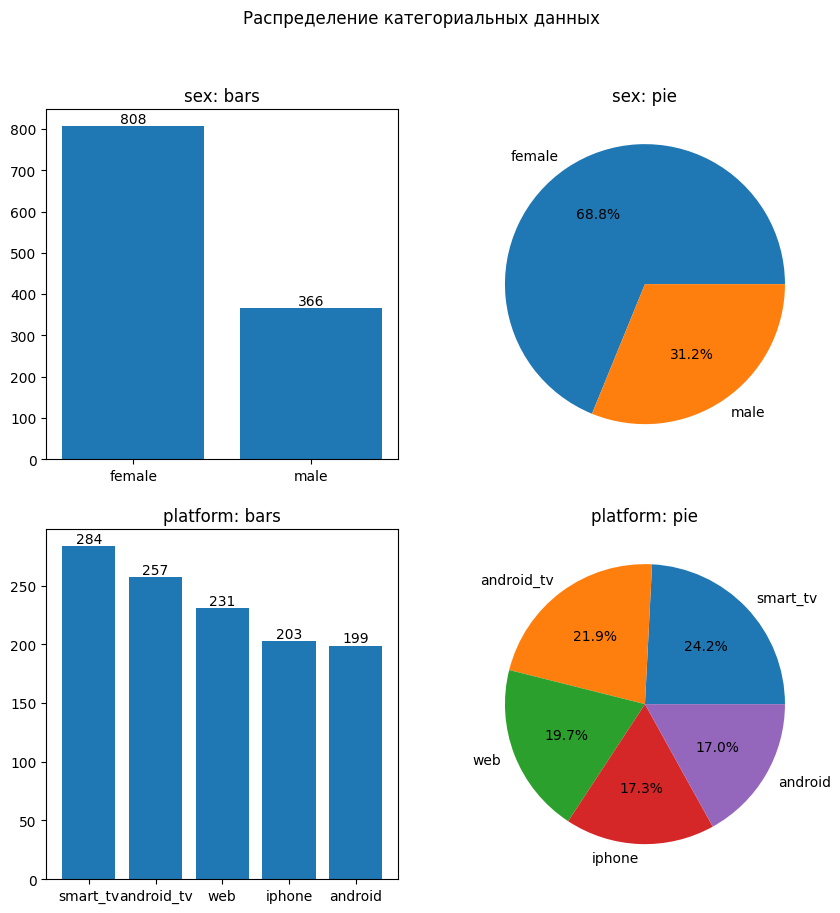

In [327]:
objects_distribution(dataset_nan_news, rem=["query_text", "query_type", "event", "doc_type"])

In [277]:
dataset_news.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,4.715000e+03,4715.000000,4.715000e+03,4715.000000,4715.000000,4715.000000,4715.000000
mean,4.925486e+07,39.869989,5.030237e+07,11.053871,262.985578,24.388971,2.760339
std,2.889485e+07,17.362316,2.880176e+07,8.411817,958.334094,5.136421,0.506467
min,7.085900e+04,10.000000,7.331200e+04,0.000000,0.000000,11.000000,1.000000
25%,2.407562e+07,25.000000,2.527093e+07,1.000000,0.000000,21.000000,2.000000
50%,4.901846e+07,40.000000,5.085006e+07,12.000000,0.000000,25.000000,3.000000
75%,7.416368e+07,55.000000,7.546424e+07,18.000000,0.000000,28.000000,3.000000
max,9.999474e+07,69.000000,9.988629e+07,30.000000,7140.000000,37.000000,5.000000


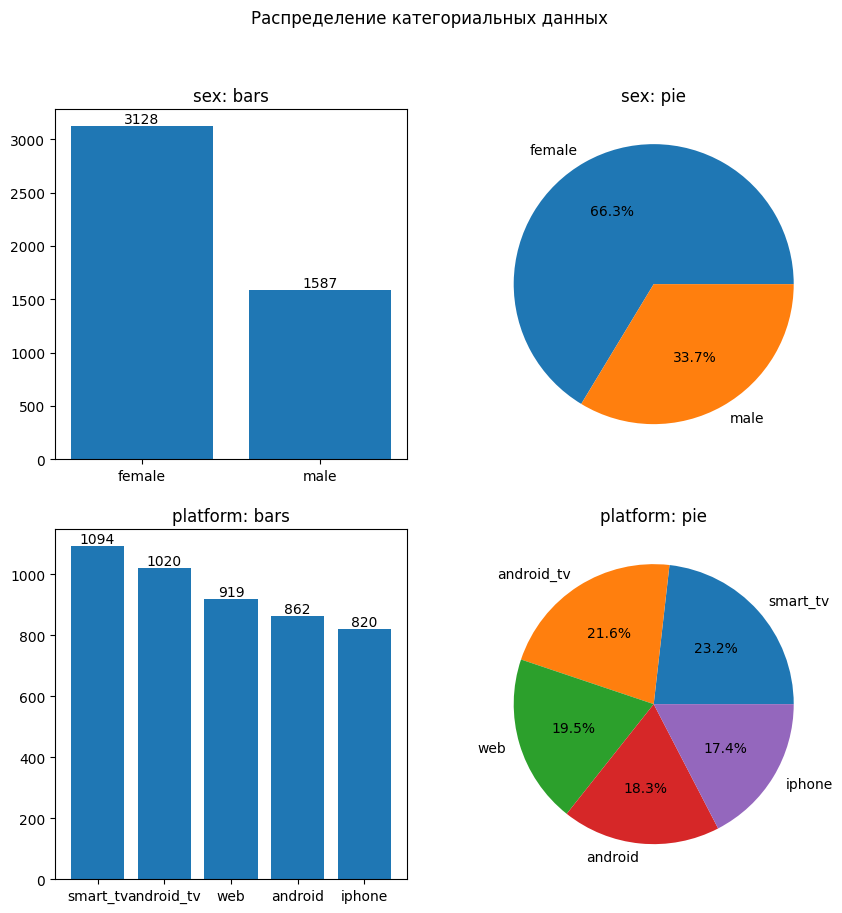

In [328]:
objects_distribution(dataset_news, rem=["query_text", "query_type", "event", "doc_type"])

In [278]:
dataset_no_nan_news.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,3.541000e+03,3541.000000,3.541000e+03,3541.000000,3541.000000,3541.000000,3541.000000
mean,4.870352e+07,39.471901,5.061115e+07,14.718724,350.177069,24.419373,2.763344
std,2.875271e+07,17.255298,2.878445e+07,6.345688,1091.989597,5.124061,0.506924
min,7.085900e+04,10.000000,7.331200e+04,1.000000,0.000000,11.000000,1.000000
25%,2.376460e+07,25.000000,2.597094e+07,10.000000,0.000000,21.000000,2.000000
50%,4.798004e+07,39.000000,5.143019e+07,15.000000,0.000000,25.000000,3.000000
75%,7.355206e+07,55.000000,7.599512e+07,19.000000,0.000000,28.000000,3.000000
max,9.999474e+07,69.000000,9.988629e+07,30.000000,7140.000000,37.000000,5.000000


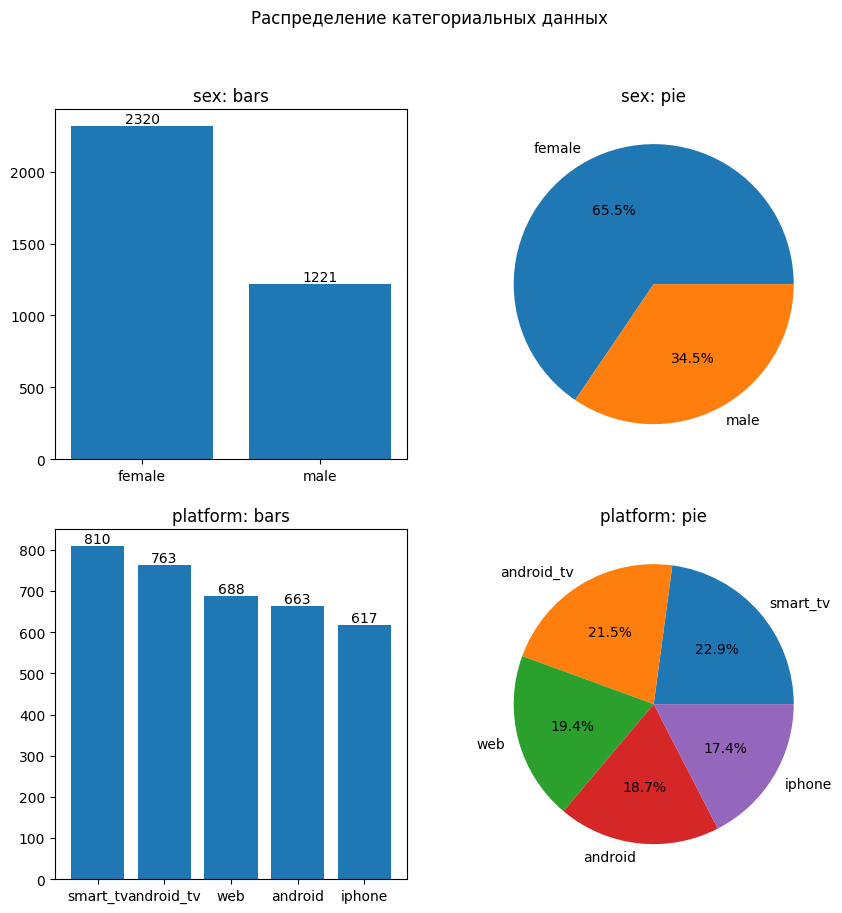

In [329]:
objects_distribution(dataset_no_nan_news, rem=["query_text", "query_type", "event", "doc_type"])

Разницы не наблюдается, всё равномерно

### Шоу

In [330]:
dataset_nan_show = dataset_nan[dataset_nan["query_type"]=="show"]
dataset_show = dataset[dataset["query_type"]=="show"]
dataset_no_nan_show = dataset_no_nan[dataset_no_nan["query_type"]=="show"]

In [331]:
dataset_nan_show.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.093000e+03,1093.000000,1.093000e+03,1093.0,1093.0,1093.000000,1093.000000
mean,4.928433e+07,39.908509,5.078633e+07,0.0,0.0,25.230558,4.416285
std,2.852599e+07,17.485809,2.957721e+07,0.0,0.0,9.290090,1.530397
min,8.480900e+04,10.000000,3.472300e+04,0.0,0.0,8.000000,2.000000
25%,2.427308e+07,25.000000,2.422738e+07,0.0,0.0,19.000000,3.000000
50%,4.903717e+07,41.000000,5.168593e+07,0.0,0.0,25.000000,4.000000
75%,7.426699e+07,55.000000,7.681258e+07,0.0,0.0,29.000000,5.000000
max,9.994831e+07,69.000000,9.990843e+07,0.0,0.0,100.000000,20.000000


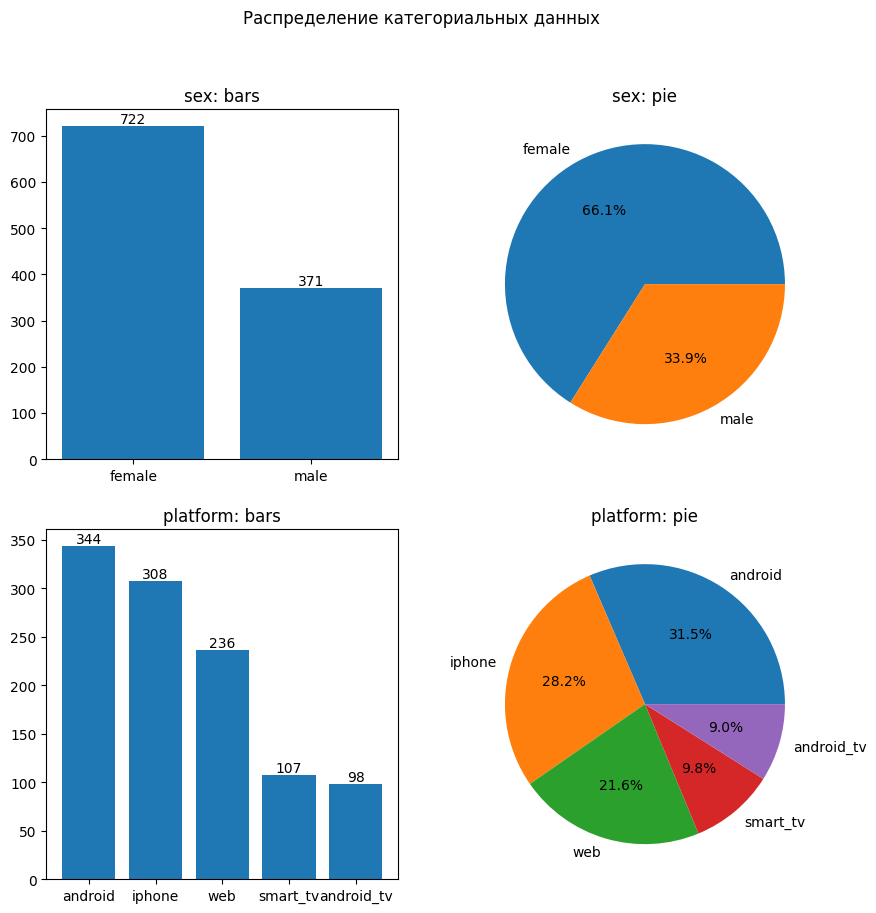

In [334]:
objects_distribution(dataset_nan_show, rem=["query_text", "query_type", "event", "doc_type"])

In [332]:
dataset_show.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,4.424000e+03,4424.000000,4.424000e+03,4424.000000,4424.000000,4424.000000,4424.000000
mean,4.911747e+07,39.084991,5.036610e+07,4.829566,227.944168,25.155063,4.451175
std,2.878442e+07,17.369689,2.899237e+07,4.306993,1024.683062,9.640352,1.616209
min,1.273000e+03,10.000000,1.146600e+04,0.000000,0.000000,8.000000,2.000000
25%,2.407086e+07,24.000000,2.529157e+07,1.000000,0.000000,19.000000,3.000000
50%,4.904100e+07,39.000000,5.087369e+07,4.000000,0.000000,25.000000,4.000000
75%,7.373884e+07,54.000000,7.577405e+07,8.000000,0.000000,29.000000,5.000000
max,9.995055e+07,69.000000,9.990843e+07,22.000000,7079.000000,100.000000,20.000000


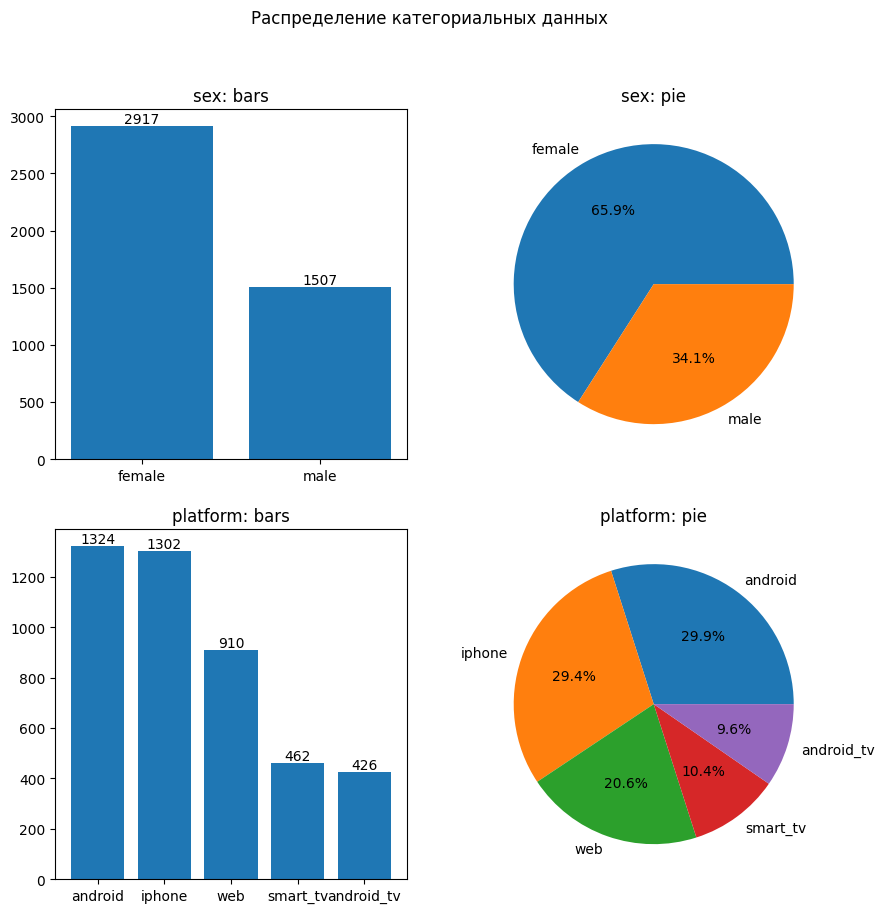

In [335]:
objects_distribution(dataset_show, rem=["query_text", "query_type", "event", "doc_type"])

In [333]:
dataset_no_nan_show.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,3.331000e+03,3331.000000,3.331000e+03,3331.000000,3331.000000,3331.000000,3331.000000
mean,4.906272e+07,38.814770,5.022821e+07,6.414290,302.739418,25.130291,4.462624
std,2.887276e+07,17.325524,2.880104e+07,3.804071,1171.305539,9.753777,1.643451
min,1.273000e+03,10.000000,1.146600e+04,1.000000,0.000000,8.000000,2.000000
25%,2.399830e+07,24.000000,2.550735e+07,3.000000,0.000000,19.000000,3.000000
50%,4.904483e+07,39.000000,5.064400e+07,6.000000,0.000000,25.000000,4.000000
75%,7.349164e+07,54.000000,7.548714e+07,9.000000,0.000000,29.000000,5.000000
max,9.995055e+07,69.000000,9.988562e+07,22.000000,7079.000000,100.000000,20.000000


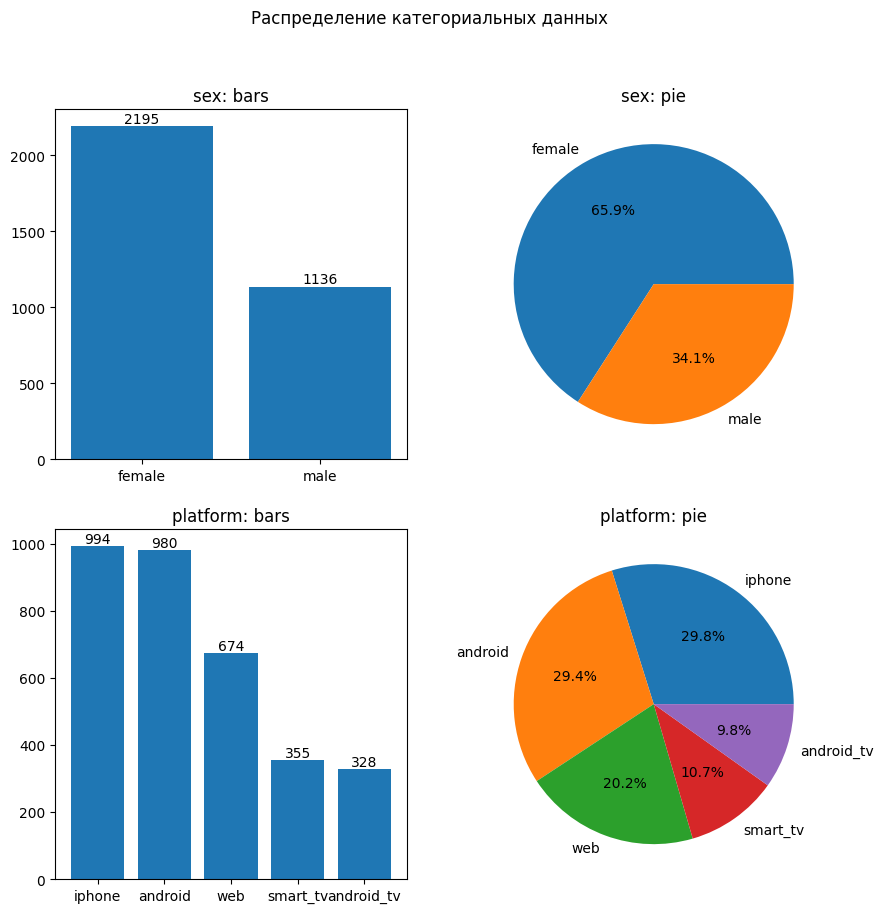

In [336]:
objects_distribution(dataset_no_nan_show, rem=["query_text", "query_type", "event", "doc_type"])

Шоу смотрят по большей части с телефонов, реже - из браузера. С умных телеков - редко.

### Музыка

In [337]:
dataset_nan_music = dataset_nan[dataset_nan["query_type"]=="music"]
dataset_music = dataset[dataset["query_type"]=="music"]
dataset_no_nan_music = dataset_no_nan[dataset_no_nan["query_type"]=="music"]

In [338]:
dataset_nan_music.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.088000e+03,1088.000000,1.088000e+03,1088.0,1088.0,1088.000000,1088.000000
mean,4.893051e+07,38.867647,4.989853e+07,0.0,0.0,24.573529,3.632353
std,2.903313e+07,17.390185,2.903169e+07,0.0,0.0,5.466644,0.865861
min,3.472300e+04,10.000000,1.032360e+05,0.0,0.0,13.000000,2.000000
25%,2.214514e+07,23.000000,2.530768e+07,0.0,0.0,21.000000,3.000000
50%,4.905064e+07,38.500000,4.920305e+07,0.0,0.0,24.000000,4.000000
75%,7.408823e+07,54.000000,7.541675e+07,0.0,0.0,28.000000,4.000000
max,9.989524e+07,69.000000,9.999539e+07,0.0,0.0,41.000000,8.000000


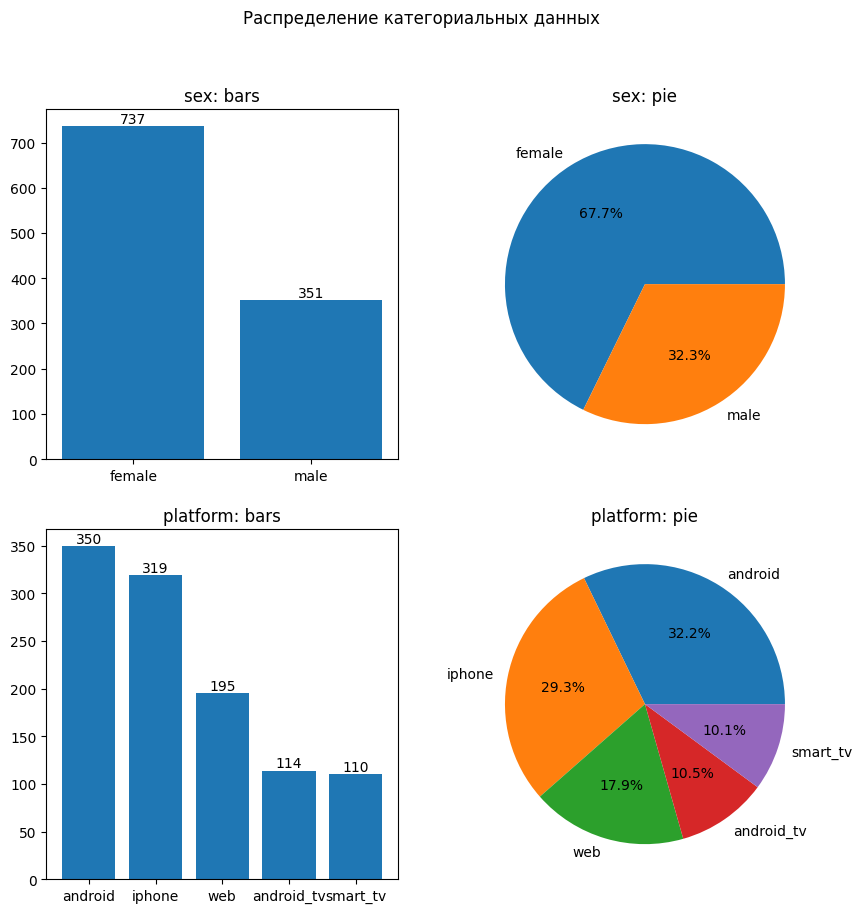

In [341]:
objects_distribution(dataset_nan_music, rem=["query_text", "query_type", "event", "doc_type"])

In [339]:
dataset_music.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,4.438000e+03,4438.000000,4.438000e+03,4438.000000,4438.000000,4438.000000,4438.000000
mean,4.917960e+07,39.308022,4.980270e+07,5.974087,385.148490,24.464624,3.645336
std,2.907788e+07,17.355865,2.880032e+07,5.205838,1483.081511,5.581327,0.906710
min,3.472300e+04,10.000000,7.193200e+04,0.000000,0.000000,13.000000,2.000000
25%,2.381739e+07,24.000000,2.513330e+07,1.000000,0.000000,21.000000,3.000000
50%,4.879167e+07,39.000000,4.948449e+07,6.000000,0.000000,24.000000,4.000000
75%,7.422774e+07,55.000000,7.451641e+07,10.000000,0.000000,28.000000,4.000000
max,9.990332e+07,69.000000,9.999539e+07,23.000000,10765.000000,41.000000,8.000000


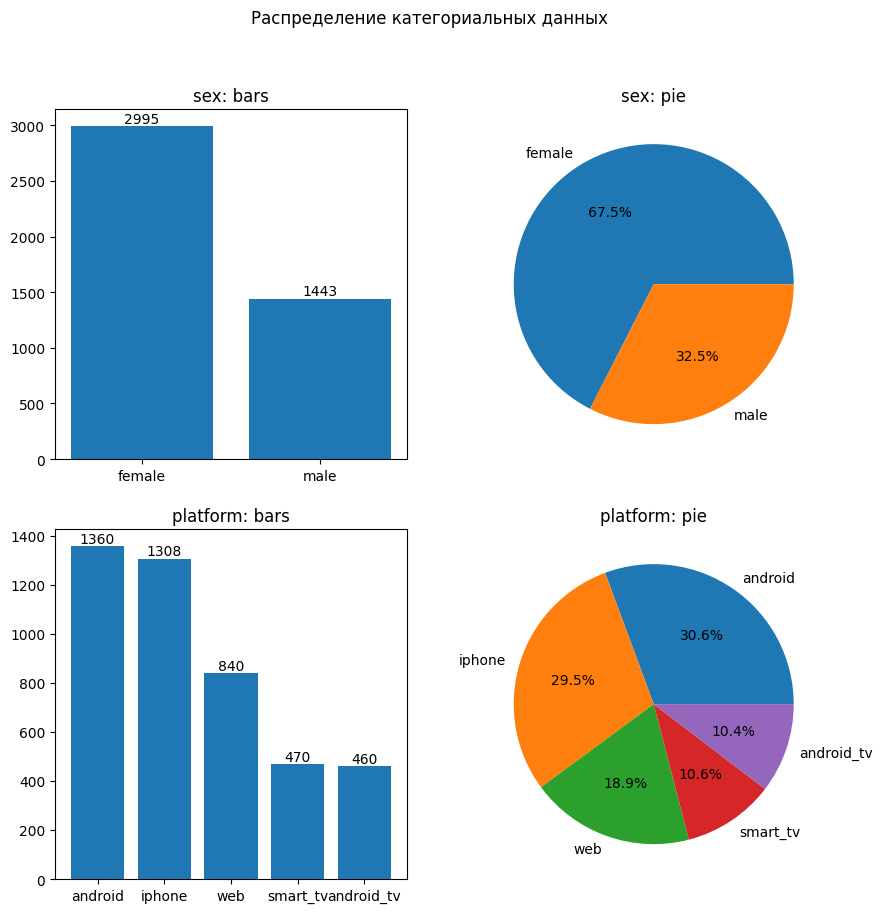

In [342]:
objects_distribution(dataset_music, rem=["query_text", "query_type", "event", "doc_type"])

In [340]:
dataset_no_nan_music.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,3.350000e+03,3350.000000,3.350000e+03,3350.000000,3350.000000,3350.000000,3350.000000
mean,4.926050e+07,39.451045,4.977157e+07,7.914328,510.235522,24.429254,3.649552
std,2.909627e+07,17.344897,2.872907e+07,4.532633,1688.270190,5.618421,0.919672
min,5.696500e+04,10.000000,7.193200e+04,1.000000,0.000000,13.000000,2.000000
25%,2.432837e+07,25.000000,2.509979e+07,4.000000,0.000000,21.000000,3.000000
50%,4.860179e+07,39.000000,4.953520e+07,8.000000,0.000000,24.000000,4.000000
75%,7.422774e+07,55.000000,7.424035e+07,11.000000,0.000000,28.000000,4.000000
max,9.990332e+07,69.000000,9.998960e+07,23.000000,10765.000000,41.000000,8.000000


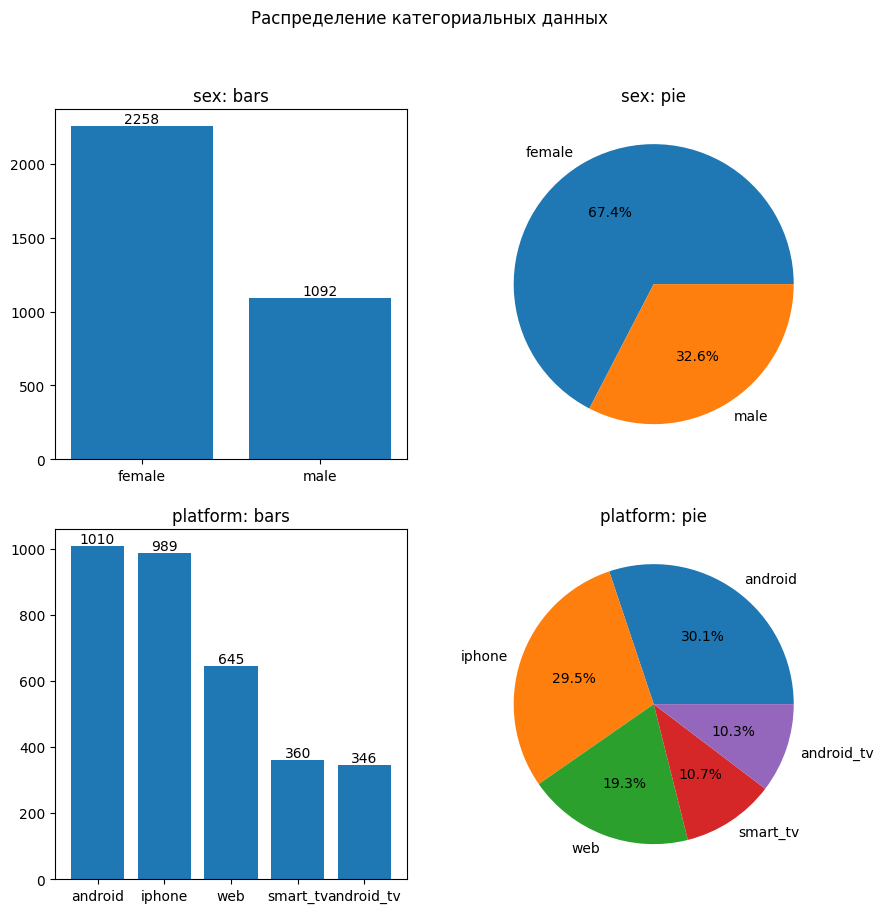

In [343]:
objects_distribution(dataset_no_nan_music, rem=["query_text", "query_type", "event", "doc_type"])

Снова смещение в сторону телефонов, но вновь без неожиданностей

### Фильмы

In [344]:
dataset_nan_films = dataset_nan[dataset_nan["query_type"]=="films"]
dataset_films = dataset[dataset["query_type"]=="films"]
dataset_no_nan_films = dataset_no_nan[dataset_no_nan["query_type"]=="films"]

In [345]:
dataset_nan_films.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,4.270000e+02,427.000000,4.270000e+02,427.0,427.0,427.000000,427.000000
mean,5.052257e+07,39.428571,5.008080e+08,0.0,0.0,29.625293,4.353630
std,2.949932e+07,17.608455,2.915283e+08,0.0,0.0,6.704362,0.958777
min,4.461810e+05,10.000000,2.822648e+06,0.0,0.0,17.000000,2.000000
25%,2.334677e+07,24.000000,2.535036e+08,0.0,0.0,24.000000,4.000000
50%,5.276723e+07,38.000000,5.070225e+08,0.0,0.0,29.000000,4.000000
75%,7.676764e+07,55.500000,7.387066e+08,0.0,0.0,34.000000,5.000000
max,9.995524e+07,69.000000,9.994174e+08,0.0,0.0,46.000000,7.000000


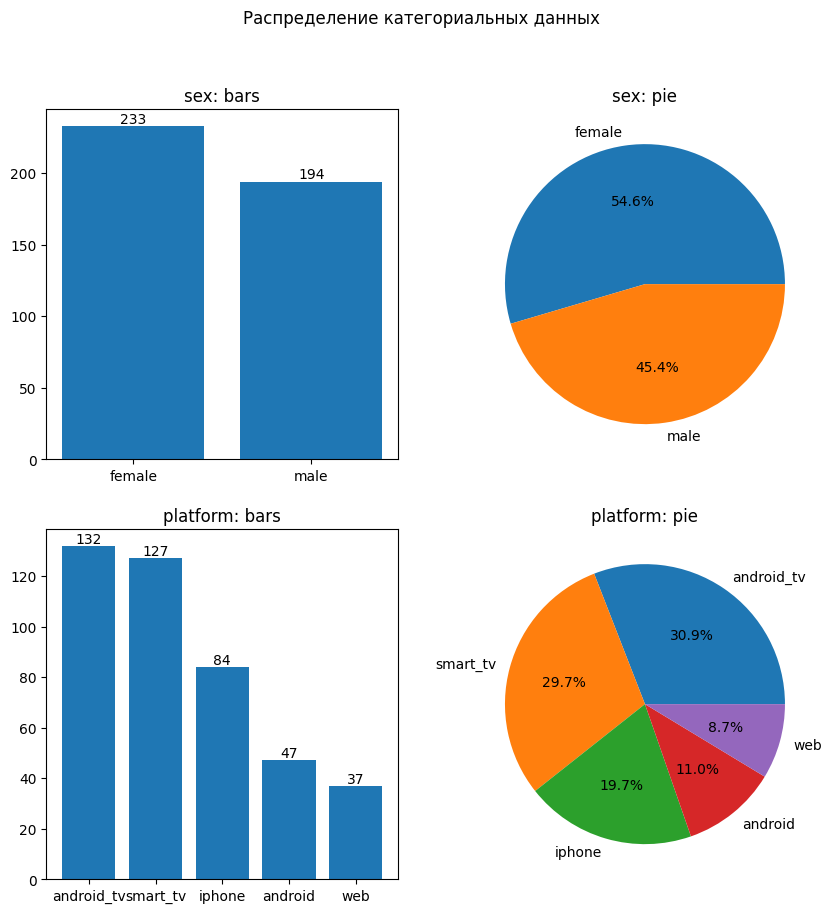

In [348]:
objects_distribution(dataset_nan_films, rem=["query_text", "query_type", "event", "doc_type"])

In [346]:
dataset_films.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.690000e+03,1690.000000,1.690000e+03,1690.000000,1690.000000,1690.000000,1690.000000
mean,5.013152e+07,38.605917,5.084764e+08,3.143787,1592.059172,29.422485,4.371006
std,2.946651e+07,17.517200,2.906287e+08,3.456064,3797.754312,6.631301,1.052325
min,1.655100e+04,10.000000,8.369200e+04,0.000000,0.000000,17.000000,2.000000
25%,2.469979e+07,23.000000,2.624299e+08,0.000000,0.000000,24.000000,4.000000
50%,5.125987e+07,38.000000,5.152494e+08,2.000000,0.000000,29.000000,4.000000
75%,7.613856e+07,54.000000,7.523187e+08,5.000000,0.000000,34.000000,5.000000
max,9.999445e+07,69.000000,9.996379e+08,16.000000,17986.000000,46.000000,7.000000


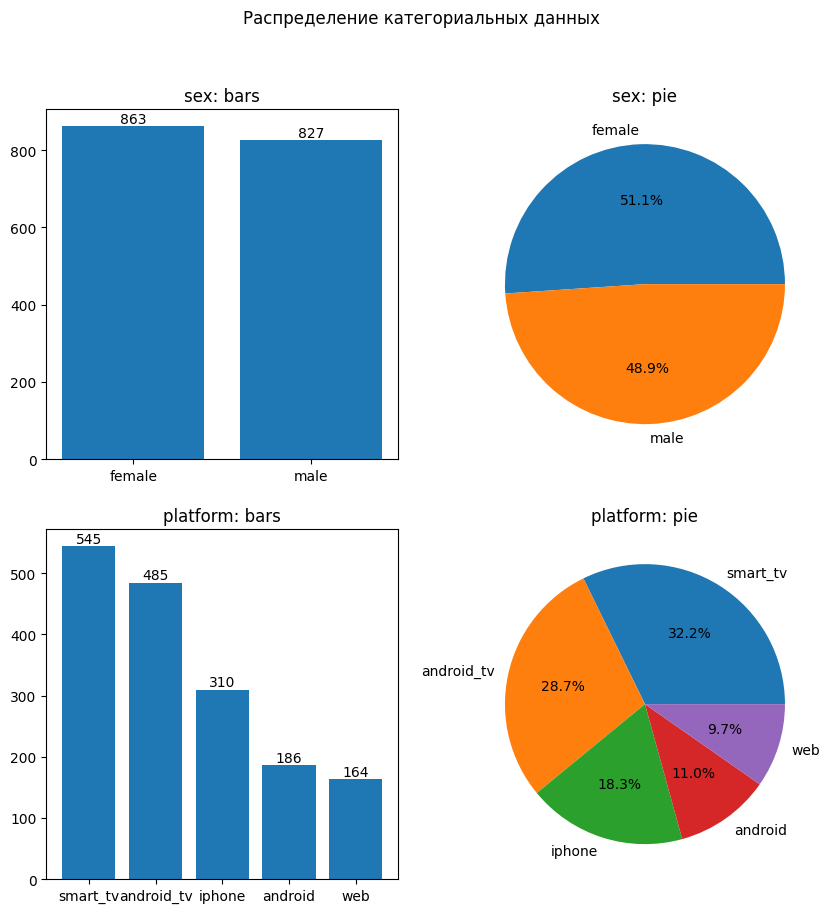

In [349]:
objects_distribution(dataset_films, rem=["query_text", "query_type", "event", "doc_type"])

In [347]:
dataset_no_nan_films.describe()

,user_id,age,query_id,click_position,view_time,query_text_length,query_text_wordcount
count,1.263000e+03,1263.000000,1.263000e+03,1263.000000,1263.000000,1263.000000,1263.000000
mean,4.999931e+07,38.327791,5.110690e+08,4.206651,2130.308789,29.353919,4.376880
std,2.946593e+07,17.484480,2.903938e+08,3.392808,4260.917581,6.607684,1.082421
min,1.655100e+04,10.000000,8.369200e+04,0.000000,0.000000,17.000000,2.000000
25%,2.493467e+07,23.000000,2.661016e+08,2.000000,0.000000,24.000000,4.000000
50%,5.072423e+07,37.000000,5.242185e+08,3.000000,0.000000,29.000000,4.000000
75%,7.575366e+07,54.000000,7.572190e+08,6.000000,2072.000000,33.500000,5.000000
max,9.999445e+07,69.000000,9.996379e+08,16.000000,17986.000000,46.000000,7.000000


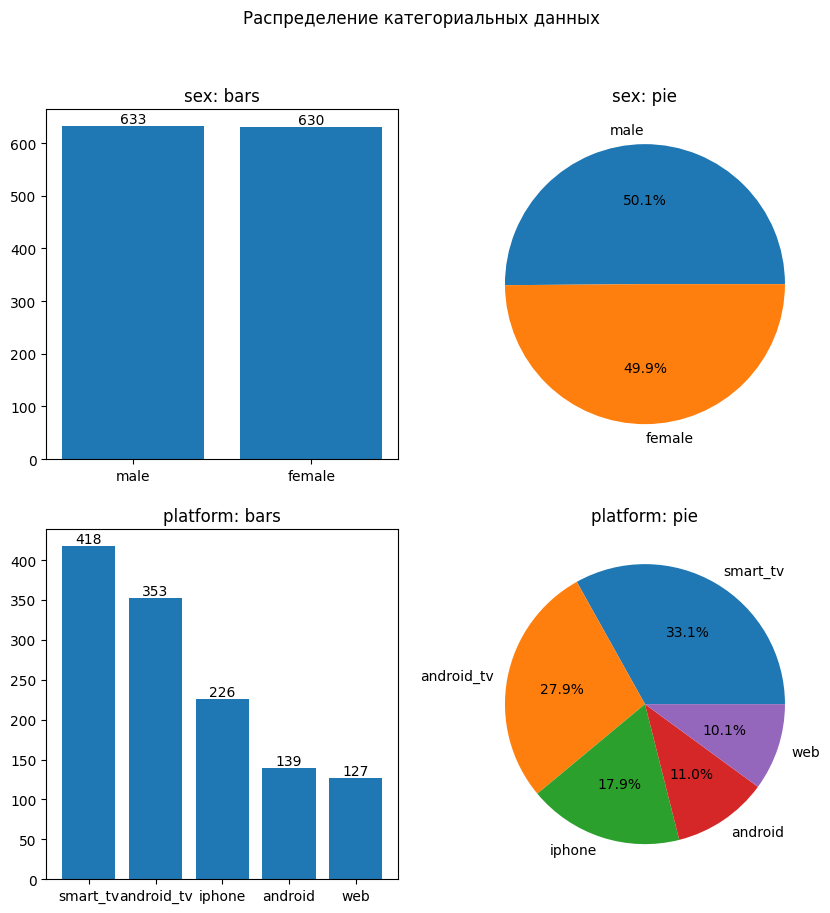

In [350]:
objects_distribution(dataset_no_nan_films, rem=["query_text", "query_type", "event", "doc_type"])

Здесь оказалось, что фильмы, в отличие от другого контента, смотрят почти поровну мужчин и женщин. Предпочтение, ожидаемо, отдано смарт-телевизорам

## Выводы - выжимка заключений всех проблем

- В среднем среди успешных поисков релевантные новости показывает существенно хуже (14.7), чем музыку (7.9) и шоу (6.4) поиск. Фильмы выводятся лучше всех (4.2) $\Rightarrow$ требуется лучше индексировать новости
- Релевантность зависит не от платформы (движок един для всех), а от того, в какую категорию классифицируется запрос.
- $\frac{1}{4}$ поисков завершается неуспешно, повторные запросы не помогают пользователям найти нужное. Среди этих нерелевантных ответов новости снова рекордсмены по количеству ненужных/ошибочных результатов (31%), затем шоу (28.9%) и музыка (28%)
- Тот факт, что средняя длина запроса, определяемая новостями, мала (~2), и музыка (~3 средняя длина) немногим лучше индексируются, проблема поиска вк видео в том, что алгоритм ошибается на очень коротких запросах - здесь точка роста.